In [201]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

In [149]:
data1 = pd.read_csv("music_genre.csv")
data2 = pd.read_csv("SpotifyFeatures.csv")

In [150]:
np.unique(data2['genre'].tolist())

array(['A Capella', 'Alternative', 'Anime', 'Blues', "Children's Music",
       'Children’s Music', 'Classical', 'Comedy', 'Country', 'Dance',
       'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Movie', 'Opera',
       'Pop', 'R&B', 'Rap', 'Reggae', 'Reggaeton', 'Rock', 'Ska', 'Soul',
       'Soundtrack', 'World'], dtype='<U16')

In [151]:
delete_gen = ['A Capella', 'Alternative', 'Anime', 'Blues', "Children's Music",
       'Children’s Music', 'Classical', 'Comedy', 'Country', 'Dance',
       'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Movie', 'Opera',
     'R&B', 'Rap', 'Reggae', 'Reggaeton', 'Rock', 'Ska', 'Soul',
       'Soundtrack', 'World']

In [152]:
data2 = data2.set_index('genre')
for i in delete_gen:
    data2 = data2.drop(i, axis=0)
data2 = data2.reset_index(level=0)
# data = data.drop_duplicates(subset=['artist_name', "track_name"], keep=False)
# data = data.drop(columns = ['music_genre', 'artist_name', 'track_name', 'instance_id'], axis = 1)

In [153]:
data1 = data1.drop(columns = ['instance_id', 'obtained_date'], axis = 1).rename(columns = {'music_genre': 'genre'})
data2 = data2.drop(columns = ['track_id', 'time_signature'], axis = 1)

In [154]:
data = data1.append(data2)

In [155]:
data['genre'] = data['genre'].replace('Rap', 'Hip-Hop')

In [156]:
data = data.drop_duplicates(subset=['artist_name', "track_name"], keep=False)

In [157]:
data.groupby('genre').size()

genre
Alternative    3702
Anime          4952
Blues          4642
Classical      4935
Country        4413
Electronic     4756
Hip-Hop        4611
Jazz           4646
Pop            5851
Rock           3084
dtype: int64

In [158]:
data[data.duplicated()] #missing values

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,genre


In [159]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,45592.000000,45592.000000,45592.000000,4.559200e+04,45592.000000,45592.000000,45592.000000,45592.000000,45592.000000,45592.000000
mean,43.715038,0.324545,0.550580,2.240244e+05,0.591673,0.191213,0.191872,-9.282124,0.084033,0.454237
std,16.321760,0.348910,0.176603,1.270879e+05,0.271008,0.332506,0.161098,6.370689,0.091306,0.249627
min,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,33.000000,0.022400,0.436000,1.775228e+05,0.410000,0.000000,0.096300,-11.162000,0.035700,0.251000
50%,43.000000,0.163000,0.563000,2.192400e+05,0.637000,0.000216,0.125000,-7.317500,0.047000,0.445000
75%,55.000000,0.608000,0.677000,2.680582e+05,0.816000,0.204000,0.238000,-5.124000,0.083800,0.648000
max,100.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


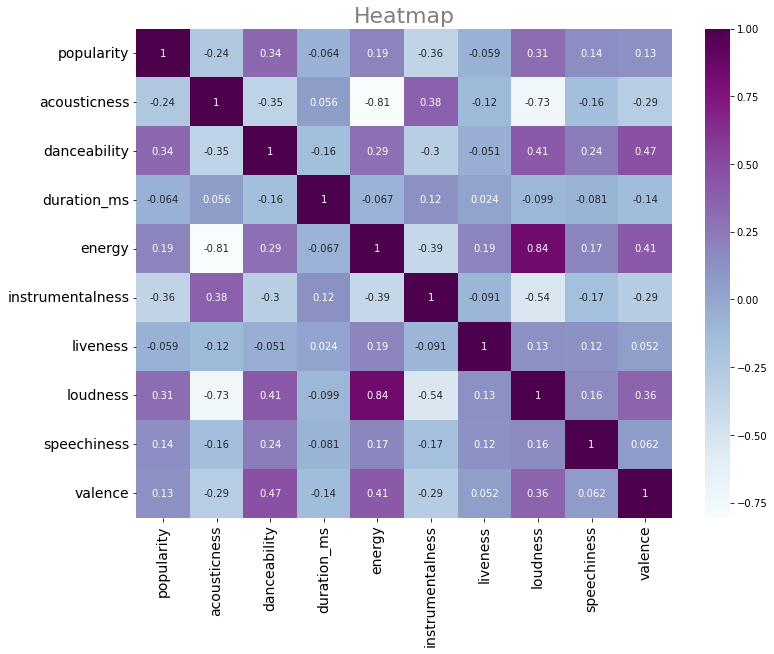

In [160]:
# Heatmap
plt.figure(figsize = (12, 9))
sns.heatmap(data.drop(['genre','artist_name','track_name','key'], axis=1).corr(), annot=True, cmap='BuPu')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Heatmap', fontsize=22, color='grey')
plt.show()

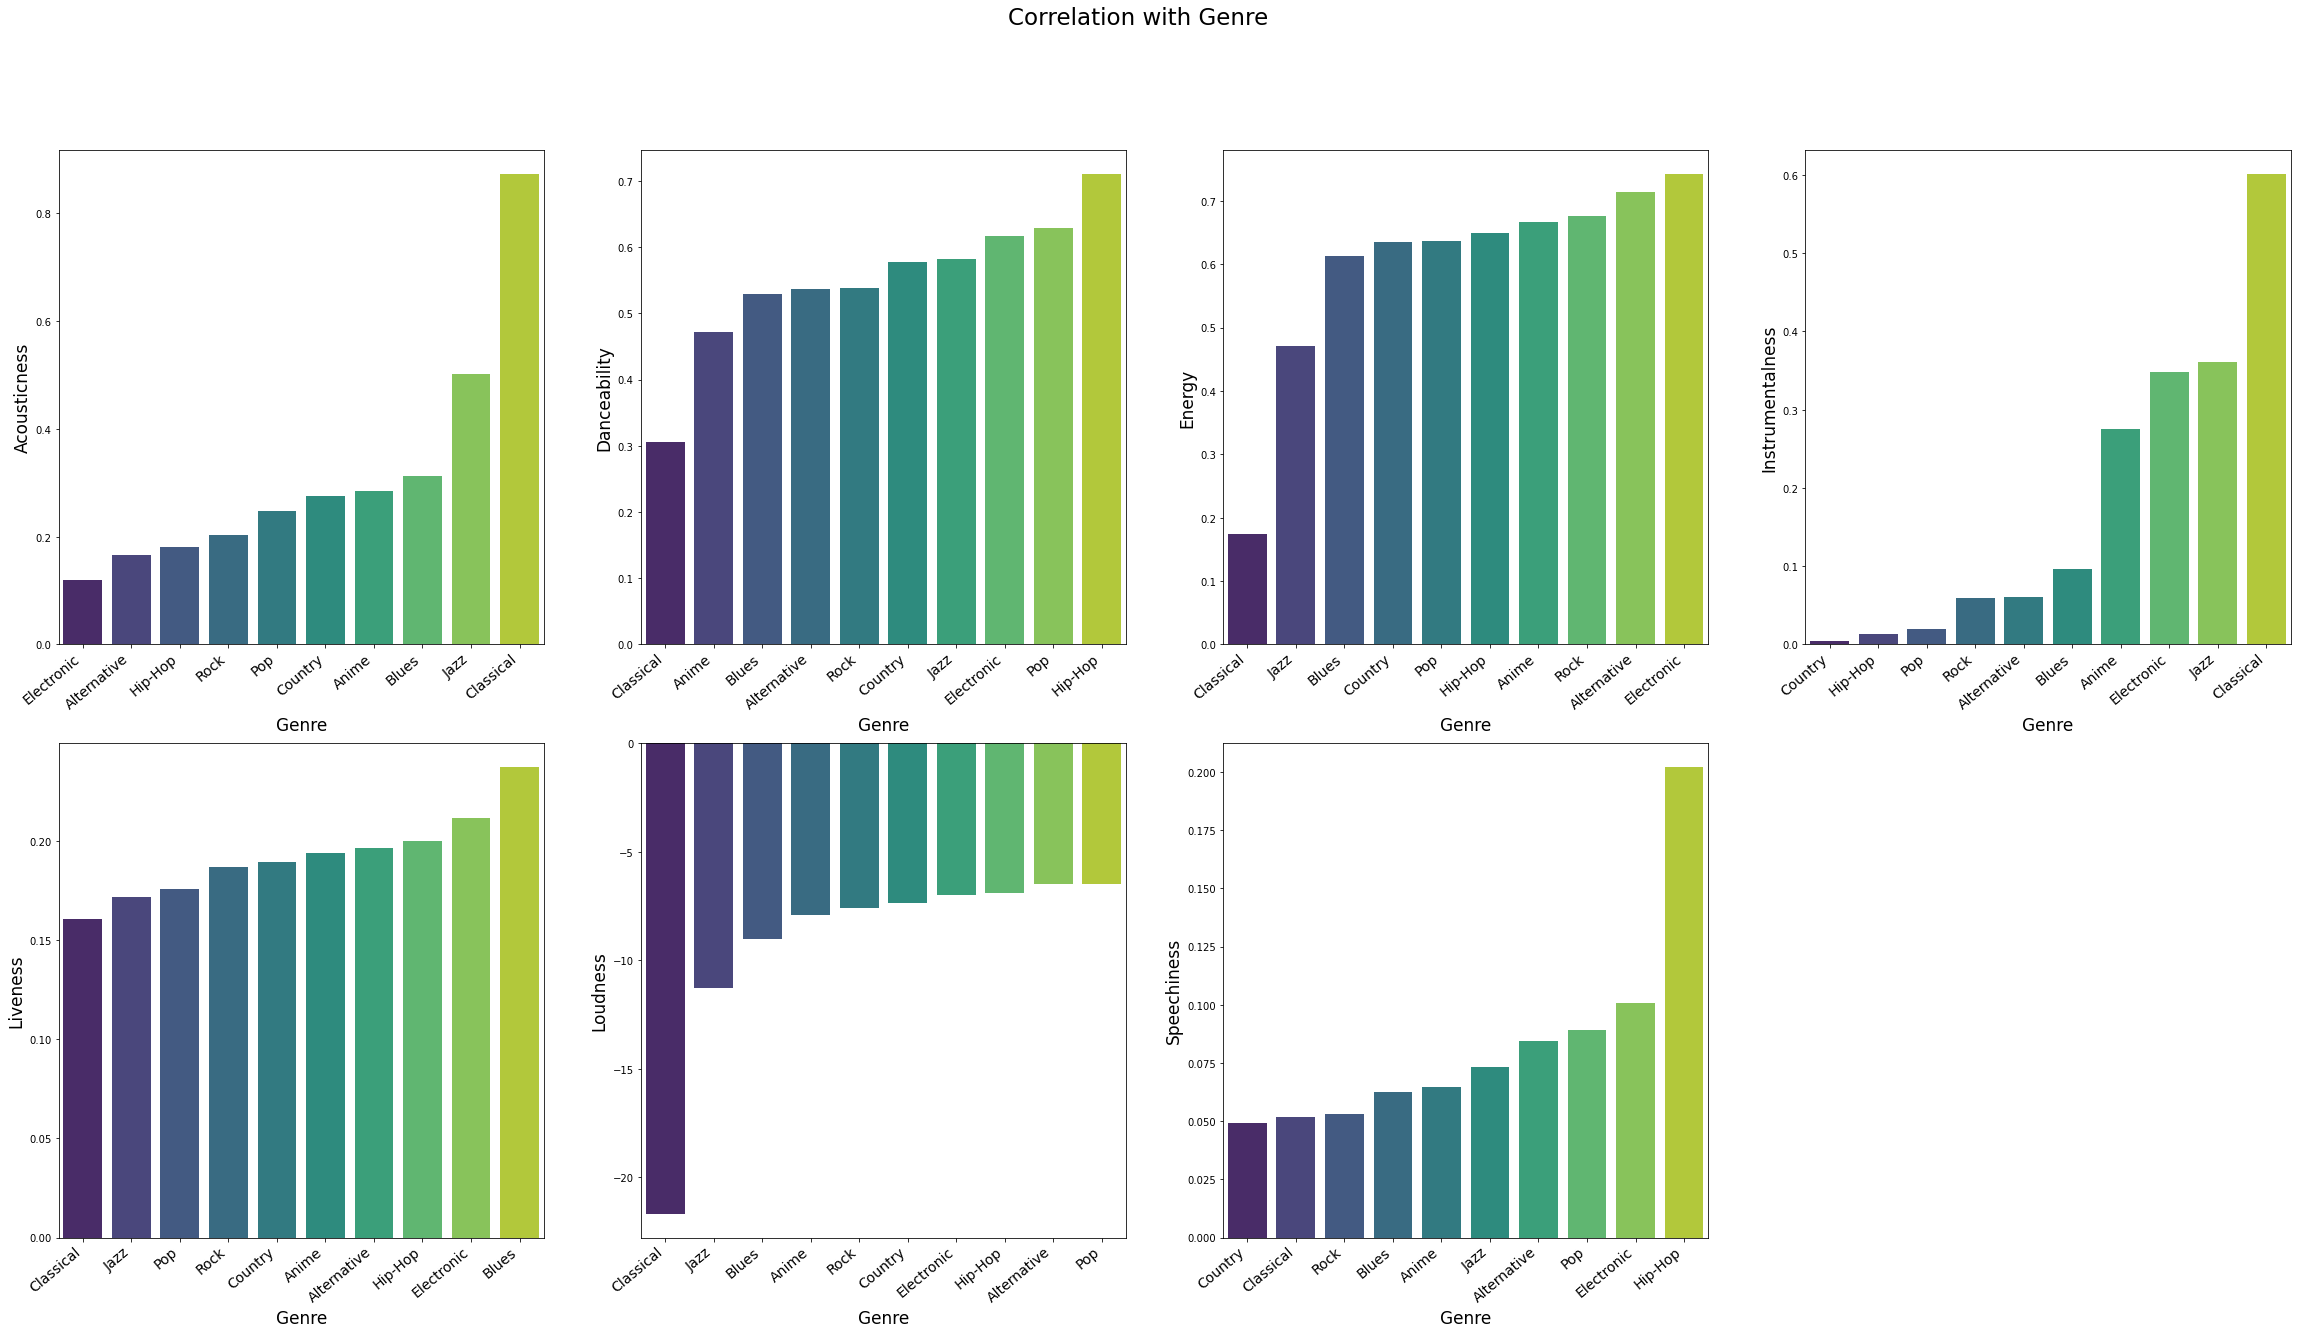

In [161]:
# sum up popularity by genre and divide them by the number of songs in each genre
genre_popularity = data[['genre','popularity']]
genre_rank =  data.groupby('genre')[['popularity']].mean().sort_values(by='popularity', ascending=True).reset_index()

# for col in ["acousticness","danceability","energy","instrumentalness","liveness","loudness", "speechiness", "popularity"]:
#     genre_popularity = data[['genre',col]]
#     genre_rank =  data.groupby('genre')[[col]].mean().sort_values(by=col, ascending=True).reset_index()

#     plt.figure(figsize = (12, 6))
#     sns.barplot(x='genre', y=col, data=genre_rank, palette = "viridis")

#     plt.xticks(fontsize=14, rotation=40,ha="right")
#     plt.yticks(fontsize=14)
#     plt.xlabel('Genre', fontsize=18)
#     plt.ylabel( col.capitalize(), fontsize=18)
#     plt.title('Average of ' + col +' by genres', fontweight='bold', fontsize=22, color='grey')
#     plt.show()
    
plt.figure(figsize=(40,20))
num1 = 1

for col in ["acousticness","danceability","energy","instrumentalness","liveness","loudness", "speechiness", "popularity"]:
    if num1<=7:
        ax = plt.subplot(2,4, num1)
        #genre_popularity = data[['genre',col]]
        genre_rank =  data.groupby('genre')[[col]].mean().sort_values(by=col, ascending=True).reset_index()
        sns.barplot(x='genre', y=col, data=genre_rank, palette = "viridis")
        plt.xlabel('Genre', fontsize= 17)
        plt.xticks(fontsize=14, rotation=40,ha="right")
        plt.ylabel(col.capitalize(),fontsize = 17)
    num1 +=1
plt.suptitle("Correlation with Genre",fontsize = 23)
plt.show()

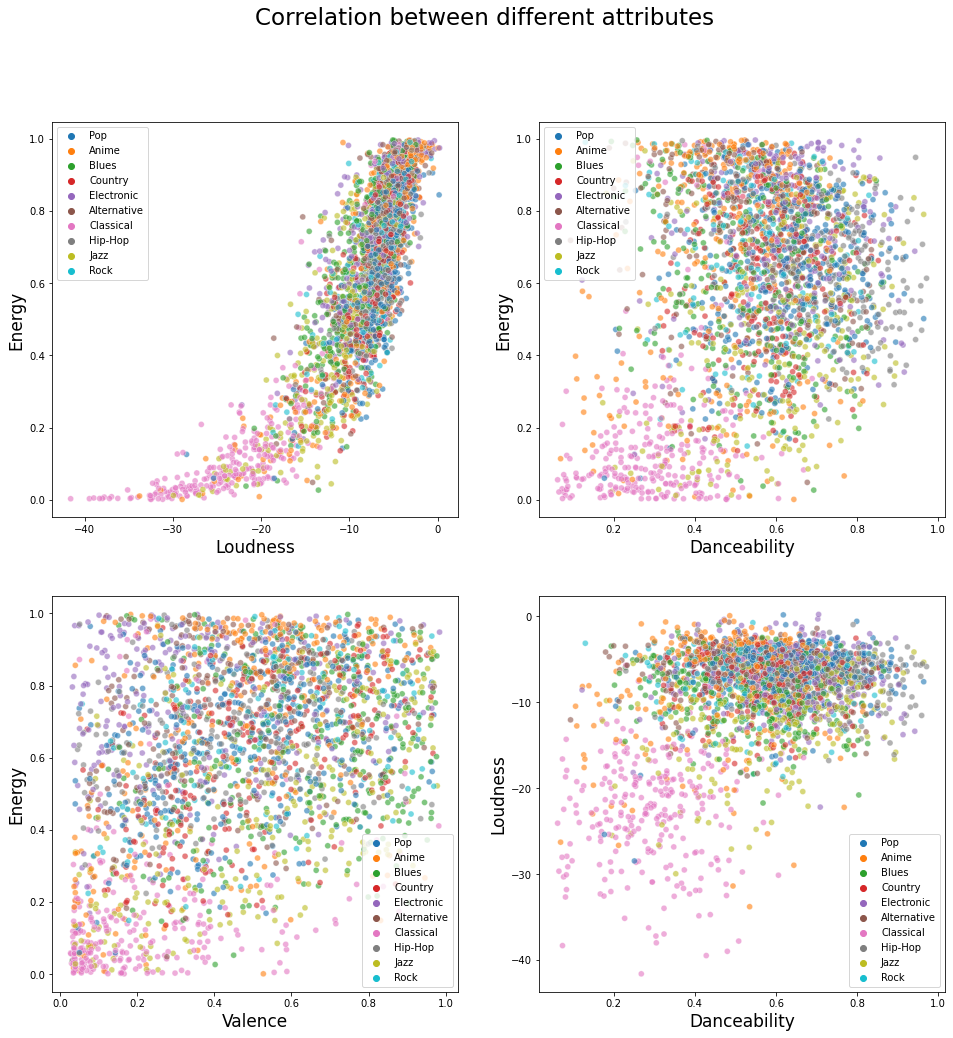

In [162]:
df_sub2 = data.sample(int(0.06*len(data)))

plt.figure(figsize=(16,16))
num1 = 1


ax = plt.subplot(2,2, 1)
sns.scatterplot(x ="loudness", y="energy", data=df_sub2, hue='genre', legend = "auto", alpha=0.6)
plt.xlabel("Loudness",fontsize = 17)
plt.ylabel("Energy",fontsize = 17)
plt.legend()

ax = plt.subplot(2,2, 2)
sns.scatterplot(x ="danceability", y="energy", data=df_sub2, hue='genre', legend = "auto", alpha=0.6)
plt.xlabel("Danceability",fontsize = 17)
plt.ylabel("Energy",fontsize = 17)
plt.legend()

ax = plt.subplot(2,2,3)
sns.scatterplot(x ="valence", y="energy", data=df_sub2, hue='genre', legend = "auto", alpha=0.6)
plt.xlabel("Valence",fontsize = 17)
plt.ylabel("Energy",fontsize = 17)
plt.legend()

ax = plt.subplot(2,2,4)
sns.scatterplot(x ="danceability", y="loudness", data=df_sub2, hue='genre', legend = "auto", alpha=0.6)
plt.xlabel("Danceability",fontsize = 17)
plt.ylabel("Loudness",fontsize = 17)
plt.legend()

plt.suptitle("Correlation between different attributes",fontsize = 23)
plt.show()

In [163]:
unused_col = ['artist_name', 'track_name', 'tempo', 'duration_ms']
data = data.drop(columns=unused_col).reset_index(drop=True)

In [164]:
data.select_dtypes(exclude='number').head()

,key,mode,genre
0,A#,Minor,Electronic
1,D,Minor,Electronic
2,G#,Major,Electronic
3,C#,Major,Electronic
4,F#,Major,Electronic


In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45592 entries, 0 to 45591
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        45592 non-null  float64
 1   acousticness      45592 non-null  float64
 2   danceability      45592 non-null  float64
 3   energy            45592 non-null  float64
 4   instrumentalness  45592 non-null  float64
 5   key               45592 non-null  object 
 6   liveness          45592 non-null  float64
 7   loudness          45592 non-null  float64
 8   mode              45592 non-null  object 
 9   speechiness       45592 non-null  float64
 10  valence           45592 non-null  float64
 11  genre             45592 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.2+ MB


In [209]:
data['genre'].unique().tolist()

['Electronic',
 'Anime',
 'Jazz',
 'Alternative',
 'Country',
 'Hip-Hop',
 'Blues',
 'Rock',
 'Classical',
 'Pop']

In [166]:
data['mode'].unique().tolist()

['Minor', 'Major']

In [167]:
data['key'].unique().tolist()

['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#']

In [210]:
mode_dict = {'Major' : 1, 'Minor' : 0}
key_dict = {'C' : 1, 'C#' : 2, 'D' : 3, 'D#' : 4, 'E' : 5, 'F' : 6, 
        'F#' : 7, 'G' : 9, 'G#' : 10, 'A' : 11, 'A#' : 12, 'B' : 12}
genre_dict = {'Alternative':0, 'Anime':1, 'Blues':2, 'Classical':3, 'Country':4, 'Electronic':5,
 'Hip-Hop':6, 'Jazz':7, 'Pop':8, 'Rock':9}
data['mode'].replace(mode_dict, inplace=True)
data['key'] = data['key'].replace(key_dict).astype(int)
data['genre'] = data['genre'].replace(genre_dict).astype(int)

In [169]:
data.head()

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,valence,genre
0,27.0,0.00468,0.652,0.941,0.79200,12,0.115,-5.201,0,0.0748,0.759,Electronic
1,31.0,0.01270,0.622,0.890,0.95000,3,0.124,-7.043,0,0.0300,0.531,Electronic
2,28.0,0.00306,0.620,0.755,0.01180,10,0.534,-4.617,1,0.0345,0.333,Electronic
3,34.0,0.02540,0.774,0.700,0.00253,2,0.157,-4.498,1,0.2390,0.270,Electronic
4,32.0,0.00465,0.638,0.587,0.90900,7,0.157,-6.266,1,0.0413,0.323,Electronic


In [170]:
data.isna().sum().sum() #missing values

0

<AxesSubplot:xlabel='count', ylabel='genre'>

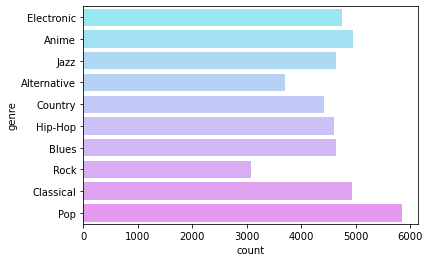

In [171]:
data['genre'].value_counts()/len(data)
sns.countplot(y="genre", data=data, palette='cool', alpha=0.5)

In [211]:
X = data.drop(columns=['genre'])
y = data['genre']
randomState = 42
testSize = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=testSize, random_state=randomState)

In [212]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [213]:
X_train.shape

(36473, 11)

In [181]:
model = RandomForestClassifier(n_estimators=80, random_state=42)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

 Alternative       0.00      0.00      0.00       705
       Anime       0.10      0.00      0.00       992
       Blues       0.14      0.00      0.00       957
   Classical       0.68      0.86      0.76       950
     Country       0.00      0.00      0.00       908
  Electronic       0.65      0.05      0.10       984
     Hip-Hop       0.46      0.52      0.49       914
        Jazz       0.59      0.11      0.18       895
         Pop       0.17      0.59      0.27      1150
        Rock       0.12      0.50      0.20       664

    accuracy                           0.27      9119
   macro avg       0.29      0.26      0.20      9119
weighted avg       0.30      0.27      0.21      9119



C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [199]:
mnb = MultinomialNB() #alpha - regularization parameter -> Laplace smoothing
mnb.fit(X_train, Y_train)
Y_pred_2 = mnb.predict(X_test)
print(classification_report(Y_test, Y_pred_2))

              precision    recall  f1-score   support

 Alternative       0.00      0.00      0.00       705
       Anime       0.00      0.00      0.00       992
       Blues       0.00      0.00      0.00       957
   Classical       0.68      0.17      0.27       950
     Country       0.00      0.00      0.00       908
  Electronic       1.00      0.00      0.00       984
     Hip-Hop       0.00      0.00      0.00       914
        Jazz       0.00      0.00      0.00       895
         Pop       0.13      1.00      0.23      1150
        Rock       0.00      0.00      0.00       664

    accuracy                           0.14      9119
   macro avg       0.18      0.12      0.05      9119
weighted avg       0.19      0.14      0.06      9119



C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [189]:
from sklearn.feature_selection import RFE
selector = RFE(model, n_features_to_select=1)
selector.fit(X_train, Y_train)

RFE(estimator=RandomForestClassifier(n_estimators=80, random_state=42),
    n_features_to_select=1)

In [190]:
print(f"Model's Feature Importance")
for i in range(len(selector.ranking_)):
    print(f"#{i+1}: {X.columns[selector.ranking_[i]-1]} ")

Model's Feature Importance
#1: danceability 
#2: acousticness 
#3: energy 
#4: liveness 
#5: key 
#6: speechiness 
#7: mode 
#8: popularity 
#9: valence 
#10: instrumentalness 
#11: loudness 


In [191]:
selector_NB = RFE(mnb, n_features_to_select=1)
selector_NB.fit(X_train, Y_train)

C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101:

RFE(estimator=MultinomialNB(), n_features_to_select=1)

In [193]:
print(f"Model's Feature Importance")
for i in range(len(selector_NB.ranking_)):
    print(f"#{i+1}: {X.columns[selector_NB.ranking_[i]-1]} ")

Model's Feature Importance
#1: instrumentalness 
#2: energy 
#3: liveness 
#4: mode 
#5: acousticness 
#6: loudness 
#7: danceability 
#8: valence 
#9: speechiness 
#10: popularity 
#11: key 


In [195]:
svm = SGDClassifier(alpha=.001, penalty="elasticnet")
svm.fit(X_train, Y_train)
Y_pred_3 = svm.predict(X_test)
print(classification_report(Y_test, Y_pred_3))

              precision    recall  f1-score   support

 Alternative       0.00      0.00      0.00       705
       Anime       0.00      0.00      0.00       992
       Blues       0.00      0.00      0.00       957
   Classical       0.72      0.17      0.28       950
     Country       0.00      0.00      0.00       908
  Electronic       0.00      0.00      0.00       984
     Hip-Hop       0.00      0.00      0.00       914
        Jazz       0.00      0.00      0.00       895
         Pop       0.13      1.00      0.23      1150
        Rock       0.00      0.00      0.00       664

    accuracy                           0.14      9119
   macro avg       0.09      0.12      0.05      9119
weighted avg       0.09      0.14      0.06      9119



C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [196]:
selector_SVM = RFE(svm, n_features_to_select=1)
selector_SVM.fit(X_train, Y_train)
print(f"Model's Feature Importance")
for i in range(len(selector_SVM.ranking_)):
    print(f"#{i+1}: {X.columns[selector_SVM.ranking_[i]-1]} ")

Model's Feature Importance
#1: popularity 
#2: energy 
#3: danceability 
#4: liveness 
#5: key 
#6: speechiness 
#7: mode 
#8: acousticness 
#9: valence 
#10: instrumentalness 
#11: loudness 


In [206]:
nn = MLPClassifier(solver='adam', hidden_layer_sizes=(80, 10), random_state=1)
nn.fit(X_train, Y_train)
Y_pred_4 = nn.predict(X_test)
print(classification_report(Y_test, Y_pred_4))

              precision    recall  f1-score   support

 Alternative       0.00      0.00      0.00       705
       Anime       0.00      0.00      0.00       992
       Blues       0.00      0.00      0.00       957
   Classical       0.75      0.17      0.27       950
     Country       0.00      0.00      0.00       908
  Electronic       0.00      0.00      0.00       984
     Hip-Hop       0.00      0.00      0.00       914
        Jazz       0.00      0.00      0.00       895
         Pop       0.15      1.00      0.27      1150
        Rock       0.00      0.00      0.00       664

    accuracy                           0.14      9119
   macro avg       0.09      0.12      0.05      9119
weighted avg       0.10      0.14      0.06      9119



C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-

In [218]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, Y_train)
Y_pred_5 = xgb.predict(X_test)
print(classification_report(Y_test, Y_pred_5))